Katie Mears - Final Project 

# Import Packages and Read in the police_fatality dataset 

In [425]:
# Import Packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# pip install folium geopandas
import folium
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats

In [440]:
# Read in the Data  - CSV file about civillian fatalities where police are present 
police_df = pd.read_csv("C:/Users/katie/OneDrive/Documents/police_fatalities.csv")
police_df.head

<bound method NDFrame.head of       Unique ID                              Subject's name Subject's age  \
0         25746                             Samuel H. Knapp            17   
1         25747                              Mark A. Horton            21   
2         25748                       Phillip A. Blurbridge            19   
3         25749                                  Mark Ortiz            23   
4             2                               Lester Miller            53   
...         ...                                         ...           ...   
28330     28331                     Name withheld by police           NaN   
28331     28332                      Christi Noelle Jarratt            42   
28332     28333                             Kaitlyn Jarratt            25   
28333     28334                     Name withheld by police            44   
28334       NaN  This is a spacer for Fatal Encounters use.           NaN   

      Subject's gender           Subject's ra

## Data Preprocessing and Cleaning - 
## Handling Missing Data, Outliers and and other Data Quality Issues  

# Missing Data in Original Dataset 

In [441]:
# Take a look at the missing values within the original dataset 
missing_values = police_df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
missing_values

Unique ID formula                                                 28333
Video                                                             28332
URL of image of deceased                                          15424
Subject's age                                                       981
Location of injury (address)                                        542
Imputation probability                                              438
Subject's race with imputations                                     430
Location of death (zip code)                                        190
Subject's gender                                                     98
Agency responsible for death                                         69
Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS           62
Location of death (city)                                             36
Date&Description                                                     35
Date (Year)                                                     

In [442]:
# Calculate missing values as a percentage of total data 
percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.sort_values(ascending=False)
percentage_missing

Unique ID formula                                                 622.977133
Video                                                             622.955145
URL of image of deceased                                          339.138083
Subject's age                                                      21.569921
Location of injury (address)                                       11.917326
Imputation probability                                              9.630607
Subject's race with imputations                                     9.454705
Location of death (zip code)                                        4.177661
Subject's gender                                                    2.154793
Agency responsible for death                                        1.517150
Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS          1.363237
Location of death (city)                                            0.791557
Date&Description                                                    0.769569

# Subset Dataset for California Data Only 

In [443]:
# Subset the rows where the "Location of death (state)" is "CA"  - We want to focus on California incidents for this project
ca_deaths = police_df[police_df['Location of death (state)'] == 'CA']
ca_deaths.shape
ca_deaths.head()

Unique ID         Subject's name Subject's age Subject's gender  \
0      25746        Samuel H. Knapp            17             Male   
5          1  LaTanya Janelle McCoy            24           Female   
20         8           Adrian Dolby            31             Male   
24        10         Joseph Gumpert            28             Male   
29        13      Sonny Daniel Diaz            24             Male   

             Subject's race Subject's race with imputations  \
0   European-American/White         European-American/White   
5    African-American/Black          African-American/Black   
20         Race unspecified         European-American/White   
24         Race unspecified         European-American/White   
29         Race unspecified                 Hispanic/Latino   

   Imputation probability URL of image of deceased  \
0             not imputed                      NaN   
5             not imputed                      NaN   
20            0.436938034                      NaN   
24            0.680697585                      NaN   
29            0.990977284                      NaN   

   Date of injury resulting in death (month/day/year)  \
0                                          01/01/2000   
5                                          01/02/2000   
20                                         01/06/2000   
24                                         01/07/2000   
29                                         01/09/2000   

   Location of injury (address)  ...  \
0            27898-27804 US-101  ...   
5          5700 block Mack Road  ...   
20       3400 block Gray Street  ...   
24    9600 block Cheddar Street  ...   
29  23600 block Suncrest Avenue  ...   

   A brief description of the circumstances surrounding the death  \
0   Samuel Knapp was allegedly driving a stolen ve...               
5   LaTanya Janelle McCoy's car was struck from be...               
20  SWAT officers shot and killed Adrian Dolby sho...               
24  Joseph Gumpert stopped breathing after a scuff...               
29  Deputies shot and killed Sonny Daniel Diaz whe...               

   Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS  \
0                                          Unreported       
5                                             Unknown       
20                                         Unreported       
24                                         Unreported       
29                                         Unreported       

    Intentional Use of Force (Developing)  \
0                         Vehicle/Pursuit   
5                         Vehicle/Pursuit   
20       Intentional Use of Force, Deadly   
24                                    Yes   
29       Intentional Use of Force, Deadly   

   Link to news article or photo of official document  \
0   https://drive.google.com/file/d/10DisrV8K5ReP1...   
5   http://www.recordnet.com/article/20000110/A_NE...   
20  https://docs.google.com/document/d/1DgZgZi6c4t...   
24  http://articles.latimes.com/2000/jan/10/local/...   
29  https://drive.google.com/file/d/0B62PuBu1vKRLc...   

   Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS  Video  \
0                                                  No            NaN   
5                                                  No            NaN   
20                                            Unknown            NaN   
24                                            Unknown            NaN   
29                                            Unknown            NaN   

                                     Date&Description Unique ID formula  \
0   1/1/2000: Samuel Knapp was allegedly driving a...               NaN   
5   1/2/2000: LaTanya Janelle McCoy's car was stru...               NaN   
20  1/6/2000: SWAT officers shot and killed Adrian...               NaN   
24  1/7/2000: Joseph Gumpert stopped breathing aft...               NaN   
29  1/9/2000: Deputies shot and killed Sonny Danie...               NaN   

   Unique iden

In [444]:
# Length of Dataset 
total_rows = len(ca_deaths)
total_rows

4548

# Missing Data in California Subset 

In [445]:
# View counts of missing data per column in the California subset 
ca_missing_values = ca_deaths.isnull().sum()
ca_missing_values = ca_missing_values.sort_values(ascending=False)
ca_missing_values

Unique ID formula                                                 4548
Video                                                             4548
URL of image of deceased                                          2797
Subject's age                                                      175
Imputation probability                                              62
Subject's race with imputations                                     59
Location of injury (address)                                        48
Location of death (zip code)                                        19
Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS          15
Subject's gender                                                     7
Agency responsible for death                                         7
Location of death (county)                                           3
Date (Year)                                                          2
Location of death (city)                                             1
Link t

In [447]:
# Calculate missing values as a percentage of total California data 
ca_percentage_missing = (ca_missing_values / total_rows) * 100
ca_percentage_missing = ca_percentage_missing.sort_values(ascending=False)
ca_percentage_missing

Unique ID formula                                                 100.000000
Video                                                             100.000000
URL of image of deceased                                           61.499560
Subject's age                                                       3.847845
Imputation probability                                              1.363237
Subject's race with imputations                                     1.297274
Location of injury (address)                                        1.055409
Location of death (zip code)                                        0.417766
Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS          0.329815
Subject's gender                                                    0.153914
Agency responsible for death                                        0.153914
Location of death (county)                                          0.065963
Date (Year)                                                         0.043975

# Drop non-relevant columns and columns with high volume missing data 

In [448]:
# Dropping some columns due to large portions of missing data or non-relevant to scope of project 

columns_to_drop = ["Unique ID formula", "Video", "URL of image of deceased", "Unique identifier (redundant)", 
                   "Link to news article or photo of official document", "Location of death (state)",
                   "A brief description of the circumstances surrounding the death", "Subject's name", "Full Address", "Date&Description"]

# Drop the specified columns
ca_deaths = ca_deaths.drop(columns=columns_to_drop)
ca_deaths.head()

Unique ID Subject's age Subject's gender           Subject's race  \
0      25746            17             Male  European-American/White   
5          1            24           Female   African-American/Black   
20         8            31             Male         Race unspecified   
24        10            28             Male         Race unspecified   
29        13            24             Male         Race unspecified   

   Subject's race with imputations Imputation probability  \
0          European-American/White            not imputed   
5           African-American/Black            not imputed   
20         European-American/White            0.436938034   
24         European-American/White            0.680697585   
29                 Hispanic/Latino            0.990977284   

   Date of injury resulting in death (month/day/year)  \
0                                          01/01/2000   
5                                          01/02/2000   
20                                         01/06/2000   
24                                         01/07/2000   
29                                         01/09/2000   

   Location of injury (address) Location of death (city)  \
0            27898-27804 US-101                  Willits   
5          5700 block Mack Road               Sacramento   
20       3400 block Gray Street                   Muscoy   
24    9600 block Cheddar Street                   Downey   
29  23600 block Suncrest Avenue            Moreno Valley   

    Location of death (zip code) Location of death (county)   Latitude  \
0                        95490.0                  Mendocino  39.470883   
5                        95823.0                 Sacramento  38.473949   
20                       92407.0             San Bernardino  34.157941   
24                       90242.0                Los Angeles  33.915678   
29                       92553.0                  Riverside  33.925080   

     Longitude                       Agency responsible for death  \
0  -123.361751                  Mendocino County Sheriff's Office   
5  -121.433776                       Sacramento Police Department   
20 -117.361652  San Bernardino Police Department, San Bernardi...   
24 -118.125081                           Downey Police Department   
29 -117.249796              Riverside County Sheriff's Department   

                       Cause of death  \
0                             Vehicle   
5                             Vehicle   
20                            Gunshot   
24  Beaten/Bludgeoned with instrument   
29                            Gunshot   

   Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS  \
0                                          Unreported       
5                                             Unknown       
20                                         Unreported       
24                                         Unreported       
29                                         Unreported       

   Intentional Use of Force (Developing)  \
0                        Vehicle/Pursuit   
5                        Vehicle/Pursuit   
20      Intentional Use of Force, Deadly   
24                                   Yes   
29      Intentional Use of Force, Deadly   

   Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS  Date (Year)  
0                                                  No               2000.0  
5                                                  No               2000.0  
20                                            Unknown               2000.0  
24                                            Unknown               2000.0  
29                                            Unknown               2000.0

In [412]:
# Print Column names 
print(ca_deaths.columns)

Index(['Subject's age', 'Subject's gender', 'Subject's race',
       'Subject's race with imputations', 'Imputation probability',
       'Date of injury resulting in death (month/day/year)',
       'Location of injury (address)', 'Location of death (city)',
       'Location of death (zip code)', 'Location of death (county)',
       'Latitude', 'Longitude', 'Agency responsible for death',
       'Cause of death',
       'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS',
       'Intentional Use of Force (Developing)',
       'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS',
       'Date (Year)'],
      dtype='object')


# Drop Remaining Missing Data points 

In [413]:
# Drop NaNs
ca_deaths = ca_deaths.dropna()
ca_deaths.shape

(4270, 18)

In [414]:
# Verify no missing data points remaining 
ca_missing_values2 = ca_deaths.isnull().sum()

ca_missing_values2 = ca_missing_values2.sort_values(ascending=False)
ca_missing_values2

Subject's age                                                 0
Subject's gender                                              0
Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS    0
Intentional Use of Force (Developing)                         0
Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS        0
Cause of death                                                0
Agency responsible for death                                  0
Longitude                                                     0
Latitude                                                      0
Location of death (county)                                    0
Location of death (zip code)                                  0
Location of death (city)                                      0
Location of injury (address)                                  0
Date of injury resulting in death (month/day/year)            0
Imputation probability                                        0
Subject's race with imputations         

# Drop Duplicates 

In [415]:
# View Number of duplicates in California Subset 
duplicates = ca_deaths.duplicated()

# Display rows with duplicates
duplicates = ca_deaths.duplicated()
count_duplicates = duplicates.sum()
print("Count of Duplicate Rows:", count_duplicates)

Count of Duplicate Rows: 5


In [416]:
# Drop Duplicates
ca_deaths2 = ca_deaths.drop_duplicates()
shape = ca_deaths2.shape

# Display the shape
print("Shape of ca_deaths2:", shape)

Shape of ca_deaths2: (4265, 18)


In [337]:
ca_deaths2.head()

Subject's age Subject's gender           Subject's race  \
0             17             Male  European-American/White   
5             24           Female   African-American/Black   
20            31             Male         Race unspecified   
24            28             Male         Race unspecified   
29            24             Male         Race unspecified   

   Subject's race with imputations Imputation probability  \
0          European-American/White            not imputed   
5           African-American/Black            not imputed   
20         European-American/White            0.436938034   
24         European-American/White            0.680697585   
29                 Hispanic/Latino            0.990977284   

   Date of injury resulting in death (month/day/year)  \
0                                          01/01/2000   
5                                          01/02/2000   
20                                         01/06/2000   
24                                         01/07/2000   
29                                         01/09/2000   

   Location of injury (address) Location of death (city)  \
0            27898-27804 US-101                  Willits   
5          5700 block Mack Road               Sacramento   
20       3400 block Gray Street                   Muscoy   
24    9600 block Cheddar Street                   Downey   
29  23600 block Suncrest Avenue            Moreno Valley   

   Location of death (state)  Location of death (zip code)  \
0                         CA                       95490.0   
5                         CA                       95823.0   
20                        CA                       92407.0   
24                        CA                       90242.0   
29                        CA                       92553.0   

   Location of death (county)   Latitude   Longitude  \
0                   Mendocino  39.470883 -123.361751   
5                  Sacramento  38.473949 -121.433776   
20             San Bernardino  34.157941 -117.361652   
24                Los Angeles  33.915678 -118.125081   
29                  Riverside  33.925080 -117.249796   

                         Agency responsible for death  \
0                   Mendocino County Sheriff's Office   
5                        Sacramento Police Department   
20  San Bernardino Police Department, San Bernardi...   
24                           Downey Police Department   
29              Riverside County Sheriff's Department   

                       Cause of death  \
0                             Vehicle   
5                             Vehicle   
20                            Gunshot   
24  Beaten/Bludgeoned with instrument   
29                            Gunshot   

   Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS  \
0                                          Unreported       
5                                             Unknown       
20                                         Unreported       
24                                         Unreported       
29                                         Unreported       

   Intentional Use of Force (Developing)  \
0                        Vehicle/Pursuit   
5                        Vehicle/Pursuit   
20      Intentional Use of Force, Deadly   
24                                   Yes   
29      Intentional Use of Force, Deadly   

   Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS  Date (Year)  
0                                                  No               2000.0  
5                                                  No               2000.0  
20                                            Unknown               2000.0  
24                                            Unknown               2000.0  
29                                            Unknown               2000.0

# Rename Columns 

In [417]:
# Rename the column
ca_deaths2.rename(columns={'Date of injury resulting in death (month/day/year)': 'Date'}, inplace=True)
ca_deaths2.rename(columns={"Subject's age": 'Subject_age'}, inplace=True)
ca_deaths2.rename(columns={"Subject's gender": 'Subject_gender'}, inplace=True)
ca_deaths2.rename(columns={"Subject's race": 'Subject_race'}, inplace=True)
ca_deaths2.rename(columns={"Subject's race with imputations": 'Subject_race_imp'}, inplace=True)
ca_deaths2.head()

C:\Users\katie\AppData\Local\Temp\ipykernel_20856\2277333598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_deaths2.rename(columns={'Date of injury resulting in death (month/day/year)': 'Date'}, inplace=True)
C:\Users\katie\AppData\Local\Temp\ipykernel_20856\2277333598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_deaths2.rename(columns={"Subject's age": 'Subject_age'}, inplace=True)
C:\Users\katie\AppData\Local\Temp\ipykernel_20856\2277333598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

Subject_age Subject_gender             Subject_race  \
0           17           Male  European-American/White   
5           24         Female   African-American/Black   
20          31           Male         Race unspecified   
24          28           Male         Race unspecified   
29          24           Male         Race unspecified   

           Subject_race_imp Imputation probability        Date  \
0   European-American/White            not imputed  01/01/2000   
5    African-American/Black            not imputed  01/02/2000   
20  European-American/White            0.436938034  01/06/2000   
24  European-American/White            0.680697585  01/07/2000   
29          Hispanic/Latino            0.990977284  01/09/2000   

   Location of injury (address) Location of death (city)  \
0            27898-27804 US-101                  Willits   
5          5700 block Mack Road               Sacramento   
20       3400 block Gray Street                   Muscoy   
24    9600 block Cheddar Street                   Downey   
29  23600 block Suncrest Avenue            Moreno Valley   

    Location of death (zip code) Location of death (county)   Latitude  \
0                        95490.0                  Mendocino  39.470883   
5                        95823.0                 Sacramento  38.473949   
20                       92407.0             San Bernardino  34.157941   
24                       90242.0                Los Angeles  33.915678   
29                       92553.0                  Riverside  33.925080   

     Longitude                       Agency responsible for death  \
0  -123.361751                  Mendocino County Sheriff's Office   
5  -121.433776                       Sacramento Police Department   
20 -117.361652  San Bernardino Police Department, San Bernardi...   
24 -118.125081                           Downey Police Department   
29 -117.249796              Riverside County Sheriff's Department   

                       Cause of death  \
0                             Vehicle   
5                             Vehicle   
20                            Gunshot   
24  Beaten/Bludgeoned with instrument   
29                            Gunshot   

   Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS  \
0                                          Unreported       
5                                             Unknown       
20                                         Unreported       
24                                         Unreported       
29                                         Unreported       

   Intentional Use of Force (Developing)  \
0                        Vehicle/Pursuit   
5                        Vehicle/Pursuit   
20      Intentional Use of Force, Deadly   
24                                   Yes   
29      Intentional Use of Force, Deadly   

   Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS  Date (Year)  
0                                                  No               2000.0  
5                                                  No               2000.0  
20                                            Unknown               2000.0  
24                                            Unknown               2000.0  
29                                            Unknown               2000.0

# Describe Data types or Remaining Variables 

In [418]:
data_types = ca_deaths2.dtypes

# Display the data types of each column
print(data_types)

Subject_age                                                    object
Subject_gender                                                 object
Subject_race                                                   object
Subject_race_imp                                               object
Imputation probability                                         object
Date                                                           object
Location of injury (address)                                   object
Location of death (city)                                       object
Location of death (zip code)                                  float64
Location of death (county)                                     object
Latitude                                                      float64
Longitude                                                     float64
Agency responsible for death                                   object
Cause of death                                                 object
Dispositions/Exclusi

## Convert the Subject's Age column into a numerical data type

In [419]:
# Convert the "Subject's age" to numeric as it contains numerical values
ca_deaths2.loc[:, "Subject_age"] = pd.to_numeric(ca_deaths2["Subject_age"], errors='coerce')


# Check the data types after conversion
print("\nData Types After Conversion:")
print(ca_deaths2.dtypes)


Data Types After Conversion:
Subject_age                                                   float64
Subject_gender                                                 object
Subject_race                                                   object
Subject_race_imp                                               object
Imputation probability                                         object
Date                                                           object
Location of injury (address)                                   object
Location of death (city)                                       object
Location of death (zip code)                                  float64
Location of death (county)                                     object
Latitude                                                      float64
Longitude                                                     float64
Agency responsible for death                                   object
Cause of death                                              

C:\Users\katie\AppData\Local\Temp\ipykernel_20856\3368713110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_deaths2.loc[:, "Subject_age"] = pd.to_numeric(ca_deaths2["Subject_age"], errors='coerce')
C:\Users\katie\AppData\Local\Temp\ipykernel_20856\3368713110.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ca_deaths2.loc[:, "Subject_age"] = pd.to_numeric(ca_deaths2["Subject_age"], errors='coerce')


# Distribution of Catrgorical Variables 

In [420]:
# Distribution of unique values for categorical column - Subject's age **Numerical**
categorical_summary_age = ca_deaths2["Subject_age"].value_counts()
categorical_summary_age

22.0    164
23.0    155
26.0    154
27.0    147
32.0    143
       ... 
5.0       1
83.0      1
85.0      1
88.0      1
73.0      1
Name: Subject_age, Length: 87, dtype: int64

In [347]:
# Distribution of unique values for categorical column - Subject's gender
categorical_summary_gender = ca_deaths2["Subject_gender"].value_counts()
categorical_summary_gender

Male           3879
Female          384
Transgender       2
Name: Subject_gender, dtype: int64

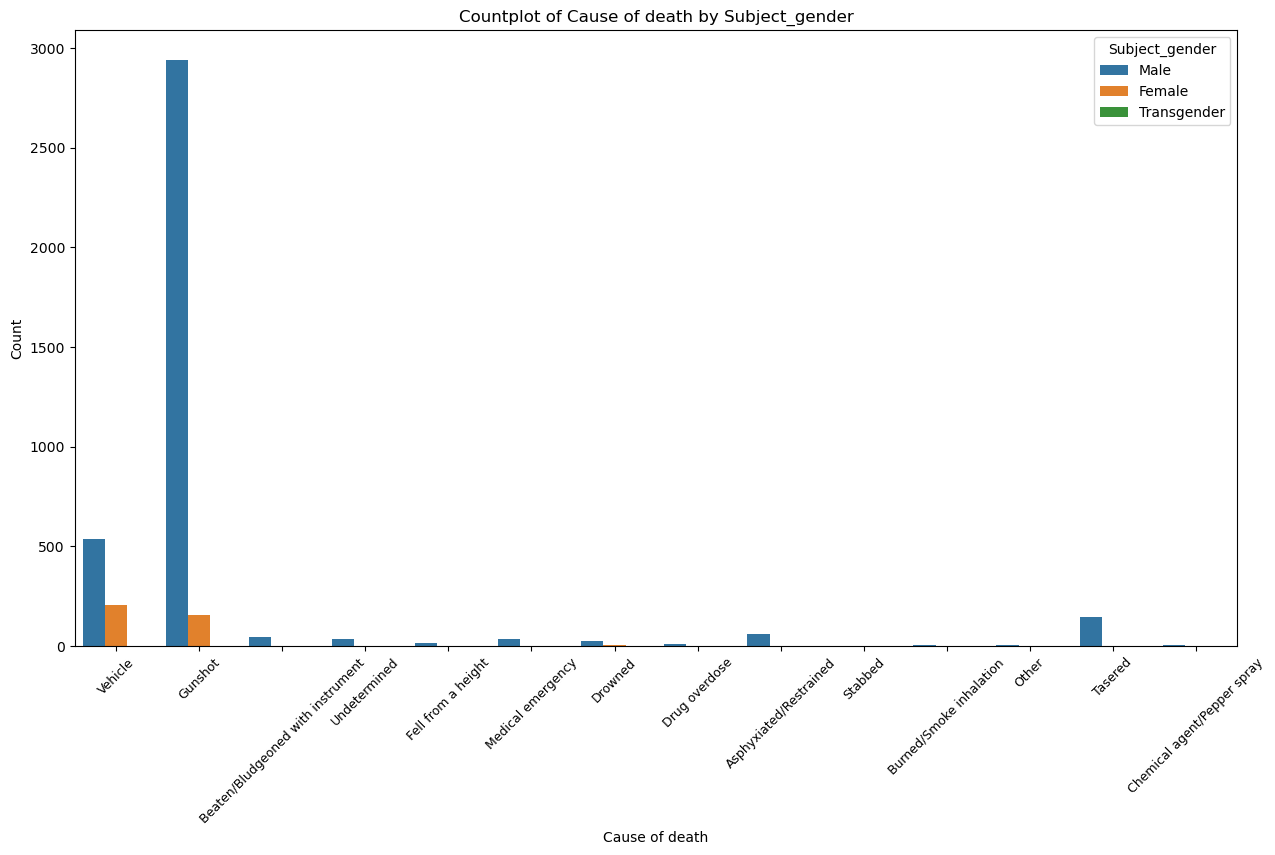

In [349]:
# Count Plot of Gender vs. Cause of death 
plt.figure(figsize=(15, 8))
sns.countplot(x="Cause of death", hue="Subject_gender", data=ca_deaths2)
plt.xlabel("Cause of death")
plt.ylabel("Count")
plt.title("Countplot of Cause of death by Subject_gender")
plt.legend(title="Subject_gender")
plt.xticks(rotation=45, fontsize=9)  
plt.show()



In [353]:
# Distribution of unique values for Subject's race
categorical_summary_race = ca_deaths2["Subject_race"].value_counts()
categorical_summary_race

Hispanic/Latino            1312
Race unspecified           1168
European-American/White     965
African-American/Black      618
Asian/Pacific Islander      159
Native American/Alaskan      29
Middle Eastern               14
Name: Subject_race, dtype: int64

In [354]:
# Distribution of unique values for Subject's race with imputations  (Possible Drop Column)
categorical_summary_race_imput = ca_deaths2["Subject_race_imp"].value_counts()
categorical_summary_race_imput

Hispanic/Latino            1721
European-American/White    1418
African-American/Black      722
Asian/Pacific Islander      205
Race unspecified            155
Native American/Alaskan      29
Middle Eastern               14
Other Race                    1
Name: Subject_race_imp, dtype: int64

In [355]:
# Distribution of unique values for Imputation probability **Numerical**  (Possible Drop Column)
categorical_summary_imput_prob = ca_deaths2["Imputation probability"].value_counts()
categorical_summary_imput_prob

not imputed            3082
race not determined     155
0.98156338                2
0.968306815               2
0.591793759               2
                       ... 
0.802576306               1
0.977814641               1
0.986630276               1
0.629204169               1
0.99674317                1
Name: Imputation probability, Length: 1024, dtype: int64

In [357]:
# Distribution of unique values for Date of injury resulting in death (month/day/year)
# Time series Data 
categorical_summary_death_date = ca_deaths2["Date"].value_counts()
categorical_summary_death_date

08/08/2009    10
07/18/2008     7
12/14/2013     6
08/18/2016     5
05/10/2005     5
              ..
04/16/2008     1
04/19/2008     1
04/20/2008     1
04/21/2008     1
06/21/2020     1
Name: Date, Length: 3119, dtype: int64

<Figure size 1000x600 with 0 Axes>

C:\Users\katie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


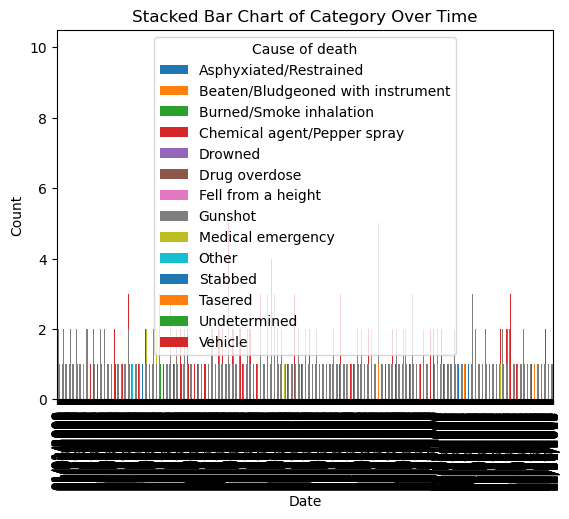

In [358]:
#Stacked Bar chart representing Cause of Death by Date 

# Pivot the data to create a suitable format for the stacked bar chart
pivot_data = ca_deaths2.pivot_table(index='Date', columns='Cause of death', aggfunc='size', fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Cause of Death Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Cause of death')
plt.show()

In [360]:
# Distribution of unique values for Location of injury (address)
categorical_summary_location = ca_deaths2["Location of injury (address)"].value_counts()
categorical_summary_location

11980 Avenue 424                                        8
5260 Garvey Rd                                          6
59770 Devils Ladder Road                                5
19828 Welby Way                                         4
South Wilmington Avenue and West Greenleaf Boulevard    4
                                                       ..
200 block Kelly Avenue                                  1
3207 California Ave.                                    1
Mountain Meadow Road                                    1
Interstate 5 Truck Rte N                                1
130 block North Temple Drive                            1
Name: Location of injury (address), Length: 4046, dtype: int64

In [361]:
# Distribution of unique values for Location of death (city)
categorical_summary_city = ca_deaths2["Location of death (city)"].value_counts()
categorical_summary_city

Los Angeles    373
San Diego      124
Fresno         122
Oakland        105
Bakersfield     94
              ... 
Greenfield       1
San Carlos       1
Bass Lake        1
Wrightwood       1
Milpitas         1
Name: Location of death (city), Length: 674, dtype: int64

In [362]:
# Distribution of unique values for Location of death (state) -
# **Drop this column since we're looking at CA only **
categorical_summary_state = ca_deaths2["Location of death (state)"].value_counts()
categorical_summary_state

CA    4265
Name: Location of death (state), dtype: int64

In [363]:
# Distribution of unique values for Location of death (county) -
categorical_summary_county = ca_deaths2["Location of death (county)"].value_counts()
categorical_summary_county

Los Angeles        1149
San Bernardino      311
San Diego           308
Riverside           252
Orange              241
Alameda             222
Fresno              147
Sacramento          147
Santa Clara         136
Kern                134
Contra Costa        115
San Joaquin         101
Tulare               99
San Francisco        90
Stanislaus           85
Ventura              69
Solano               62
Sonoma               52
Monterey             39
Shasta               39
San Mateo            39
Butte                38
Merced               37
Santa Barbara        35
Imperial             34
Placer               28
Yolo                 22
Humboldt             20
Kings                19
Madera               17
Napa                 17
Marin                16
El Dorado            15
Santa Cruz           15
Tehama               15
Sutter               14
Mendocino            14
Lake                 12
San Luis Obispo      11
Yuba                 10
San Benito            6
Siskiyou        

In [364]:
# Distribution of unique values for Agency responsible for death 
categorical_summary_agency = ca_deaths2["Agency responsible for death"].value_counts()
categorical_summary_agency

Los Angeles Police Department                                               436
Los Angeles County Sheriff's Department                                     330
California Highway Patrol                                                   235
San Bernardino County Sheriff's Office                                      115
San Diego Police Department                                                 106
                                                                           ... 
Bakersfield Police Department, Kern County Sheriff's Office                   1
California Highway Patrol, Riverside County Sheriff's Department              1
California Highway Patrol, Los Angeles County Sheriff's Department            1
U.S. Customs and Border Protection, U.S. Department of Homeland Security      1
Milpitas Police Department                                                    1
Name: Agency responsible for death, Length: 562, dtype: int64

In [365]:
# Distribution of unique values for Cause of death
# Dependent Variable = Target Variable 
categorical_summary_cause = ca_deaths2["Cause of death"].value_counts()
categorical_summary_cause

Gunshot                              3100
Vehicle                               749
Tasered                               147
Asphyxiated/Restrained                 67
Beaten/Bludgeoned with instrument      46
Medical emergency                      37
Undetermined                           35
Drowned                                32
Fell from a height                     17
Drug overdose                          13
Chemical agent/Pepper spray             7
Other                                   6
Burned/Smoke inhalation                 5
Stabbed                                 4
Name: Cause of death, dtype: int64

In [366]:
# Distribution of unique values for Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS
categorical_summary_disposition = ca_deaths2["Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS"].value_counts()
categorical_summary_disposition

Unreported                                                        1944
Pending investigation                                              813
Justified                                                          578
Unknown                                                            227
Suicide                                                            185
Cleared                                                            141
Justified by District Attorney                                     117
Criminal                                                            78
Ruled suicide                                                       62
Accidental                                                          30
Murder/suicide                                                      27
Excusable                                                           13
Civil suit/Family awarded money                                      8
Officer indicted/Acquitted                                           7
Other 

In [367]:
# Distribution of unique values for Intentional Use of Force (Developing)
categorical_summary_force = ca_deaths2["Intentional Use of Force (Developing)"].value_counts()
categorical_summary_force

Intentional Use of Force, Deadly    2849
Vehicle/Pursuit                      747
Yes                                  298
Suicide                              247
No                                    82
Undetermined                          20
Intenional Use of Force, Deadly       20
Pursuit                                2
Name: Intentional Use of Force (Developing), dtype: int64

In [368]:
# Distribution of unique values for Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS 
categorical_summary_mentalillness = ca_deaths2["Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS"].value_counts()
categorical_summary_mentalillness

No                     1952
Unknown                1537
Yes                     624
Drug or alcohol use     152
Name: Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS, dtype: int64

# Summary Statistics for Numerical Variables 

In [375]:
# Summary Statistics for Numerical Columns 
numerical_summary_stats = ca_deaths2.describe()
numerical_summary_stats

Subject_age  Location of death (zip code)     Latitude    Longitude  \
count  4252.000000                   4265.000000  4265.000000  4265.000000   
mean     34.053622                  92944.924502    35.534470  -119.317778   
std      12.804171                   1812.217883     2.090431     2.222233   
min       1.000000                  89061.000000    32.542559  -124.206041   
25%      24.000000                  91732.000000    33.930974  -121.422311   
50%      32.000000                  92708.000000    34.212094  -118.393709   
75%      42.000000                  94568.000000    37.655014  -117.896072   
max      90.000000                  97166.000000    41.912571   -71.421137   

       Date (Year)  
count  4265.000000  
mean   2009.956389  
std       5.631464  
min    2000.000000  
25%    2005.000000  
50%    2010.000000  
75%    2015.000000  
max    2020.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


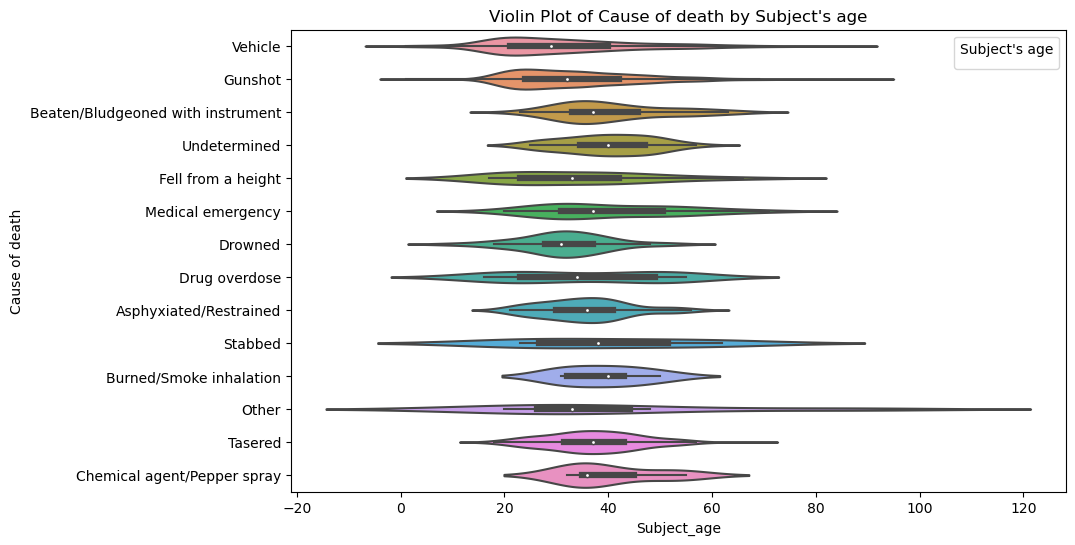

In [376]:
# Create a violin plot to visualize the distribution of Subject's age by Cause of death using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Subject_age", y="Cause of death", data=ca_deaths2, split=True)
plt.xlabel("Subject_age")
plt.ylabel("Cause of death")
plt.title("Violin Plot of Cause of death by Subject's age")
plt.legend(title="Subject's age")
plt.show()

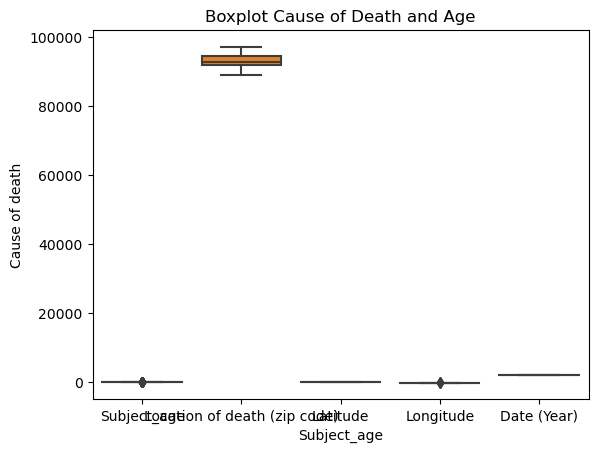

In [423]:
# Create a boxplot using Seaborn
sns.boxplot(data=ca_deaths2)

# Add labels and title
plt.xlabel("Subject_age")
plt.ylabel("Cause of death")
plt.title("Boxplot Cause of Death and Age")

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


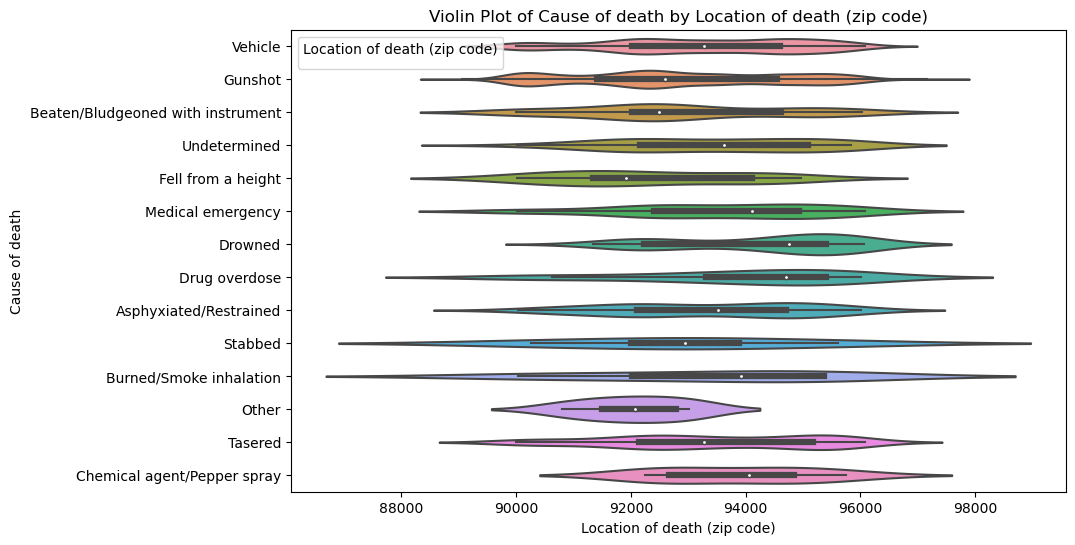

In [377]:
# Create a violin plot to visualize the distribution of Location of death (zip code) by Cause of death using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Location of death (zip code)", y="Cause of death", data=ca_deaths2, split=True)
plt.xlabel("Location of death (zip code)")
plt.ylabel("Cause of death")
plt.title("Violin Plot of Cause of death by Location of death (zip code)")
plt.legend(title="Location of death (zip code)")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


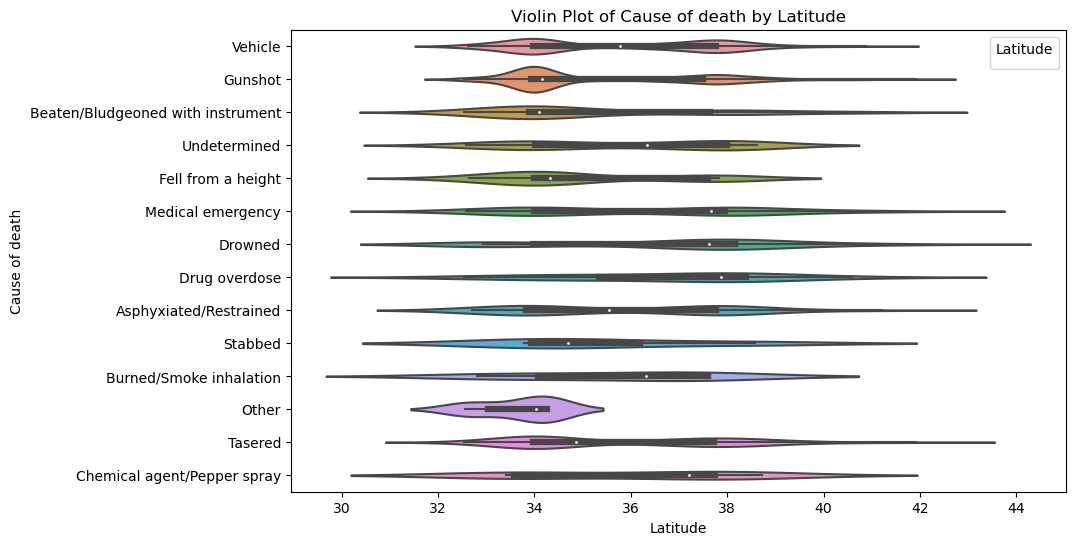

In [378]:
# Create a violin plot to visualize the distribution of Latitude by Cause of death using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Latitude", y="Cause of death", data=ca_deaths2, split=True)
plt.xlabel("Latitude")
plt.ylabel("Cause of death")
plt.title("Violin Plot of Cause of death by Latitude")
plt.legend(title="Latitude")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


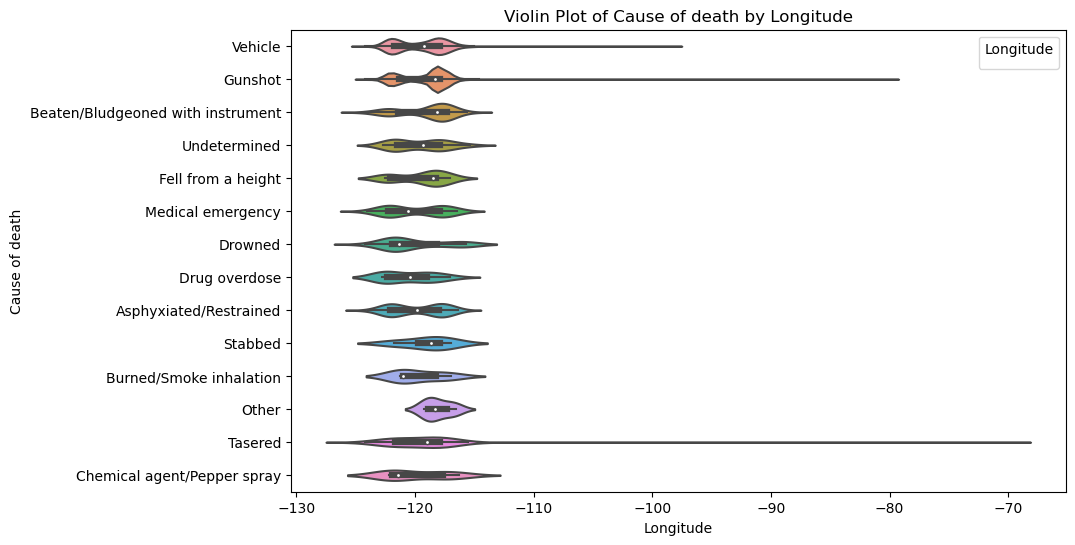

In [379]:
# Create a violin plot to visualize the distribution of Longitude by Cause of death using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Longitude", y="Cause of death", data=ca_deaths2, split=True)
plt.xlabel("Longitude")
plt.ylabel("Cause of death")
plt.title("Violin Plot of Cause of death by Longitude")
plt.legend(title="Longitude")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


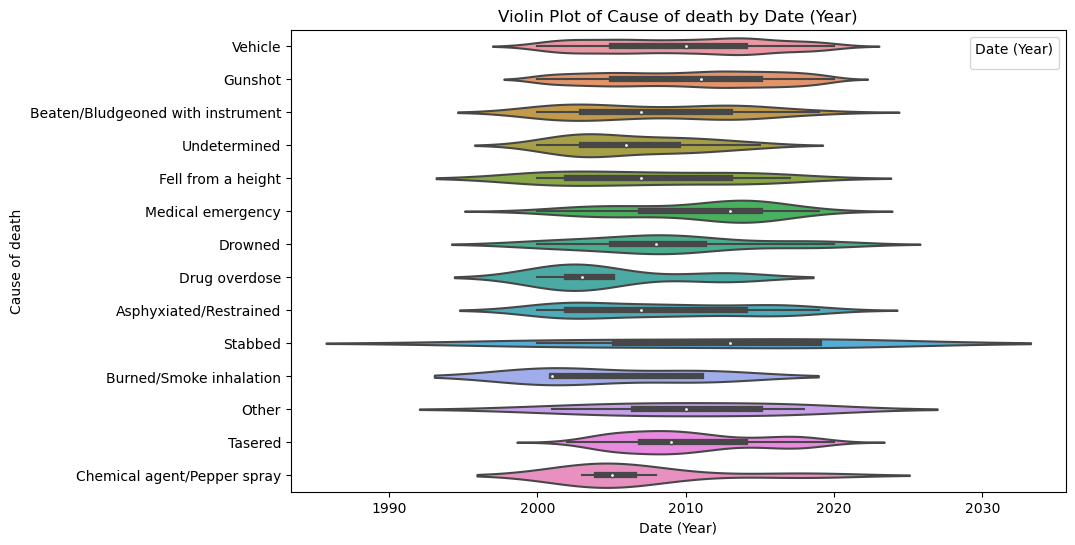

In [380]:
# Create a violin plot to visualize the distribution of Date (Year) by Cause of death using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Date (Year)", y="Cause of death", data=ca_deaths2, split=True)
plt.xlabel("Date (Year)")
plt.ylabel("Cause of death")
plt.title("Violin Plot of Cause of death by Date (Year)")
plt.legend(title="Date (Year)")
plt.show()

# Scaling Numerical Features via Standardization 

In [427]:
# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(ca_deaths2[['Date (Year)', 'Location of death (zip code)', 'Subject_age']])

In [435]:
# Convert the NumPy array to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=['Date (Year)', 'Location of death (zip code)', 'Subject_age'])

In [430]:
# Create a violin plot to visualize the distribution of Date (Year) by Cause of death using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Date (Year)", y="Cause of death", data=standardized_df, split=True)
plt.xlabel("Date (Year)")
plt.ylabel("Cause of death")
plt.title("Violin Plot of Cause of death by Date (Year)")
plt.legend(title="Date (Year)")
plt.show()

ValueError: Could not interpret input 'Cause of death'

<Figure size 1000x600 with 0 Axes>

# Pair Plot 

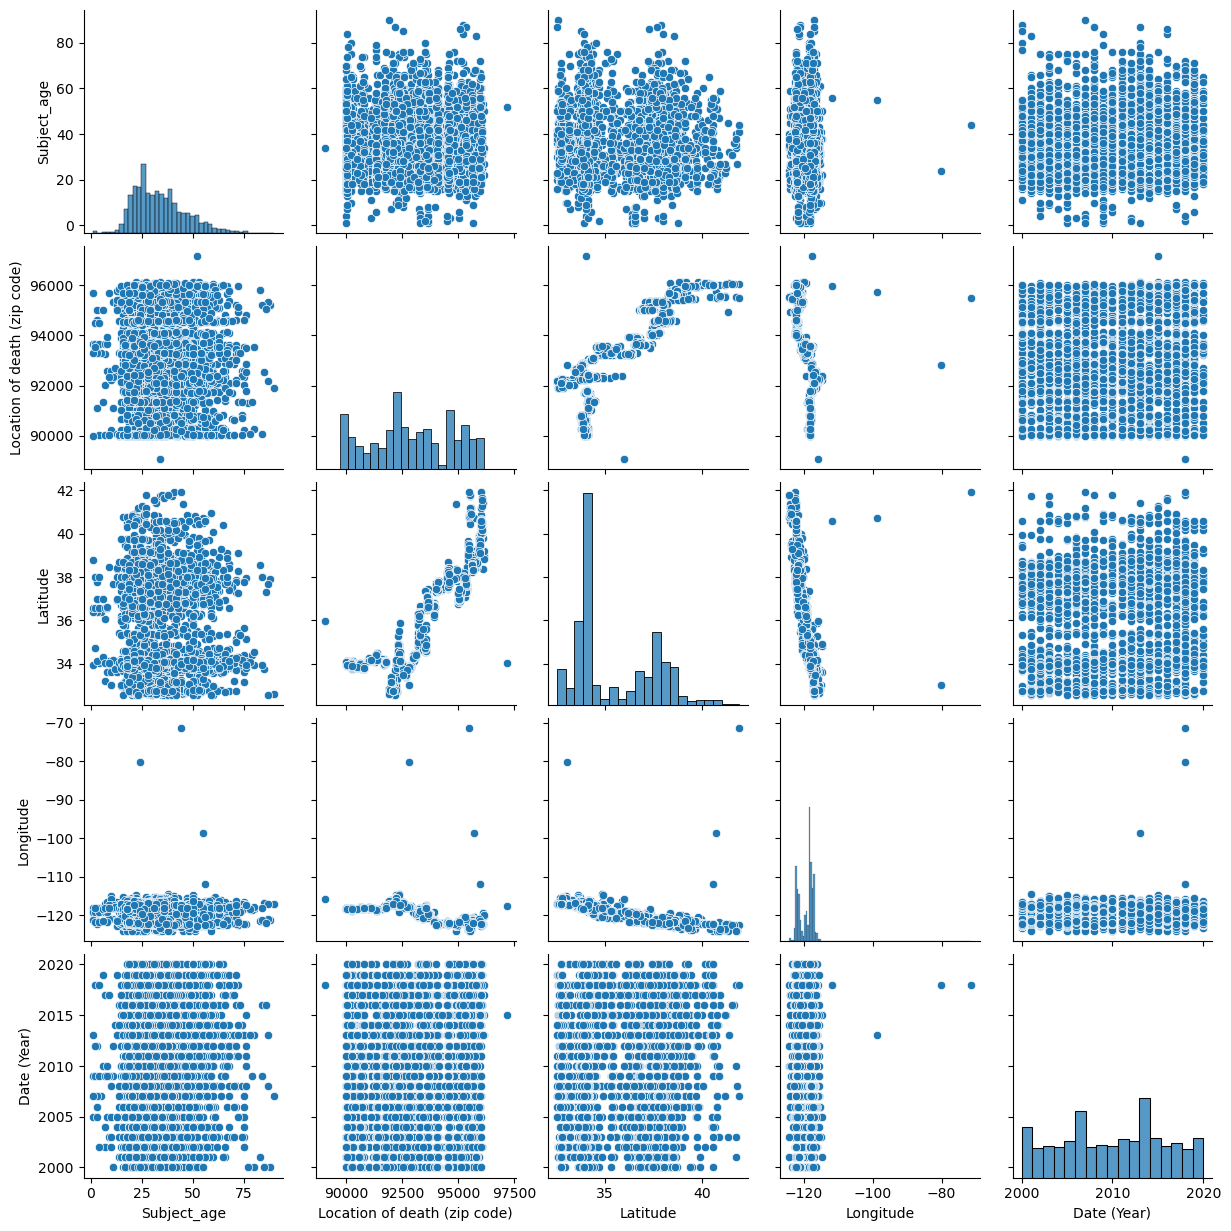

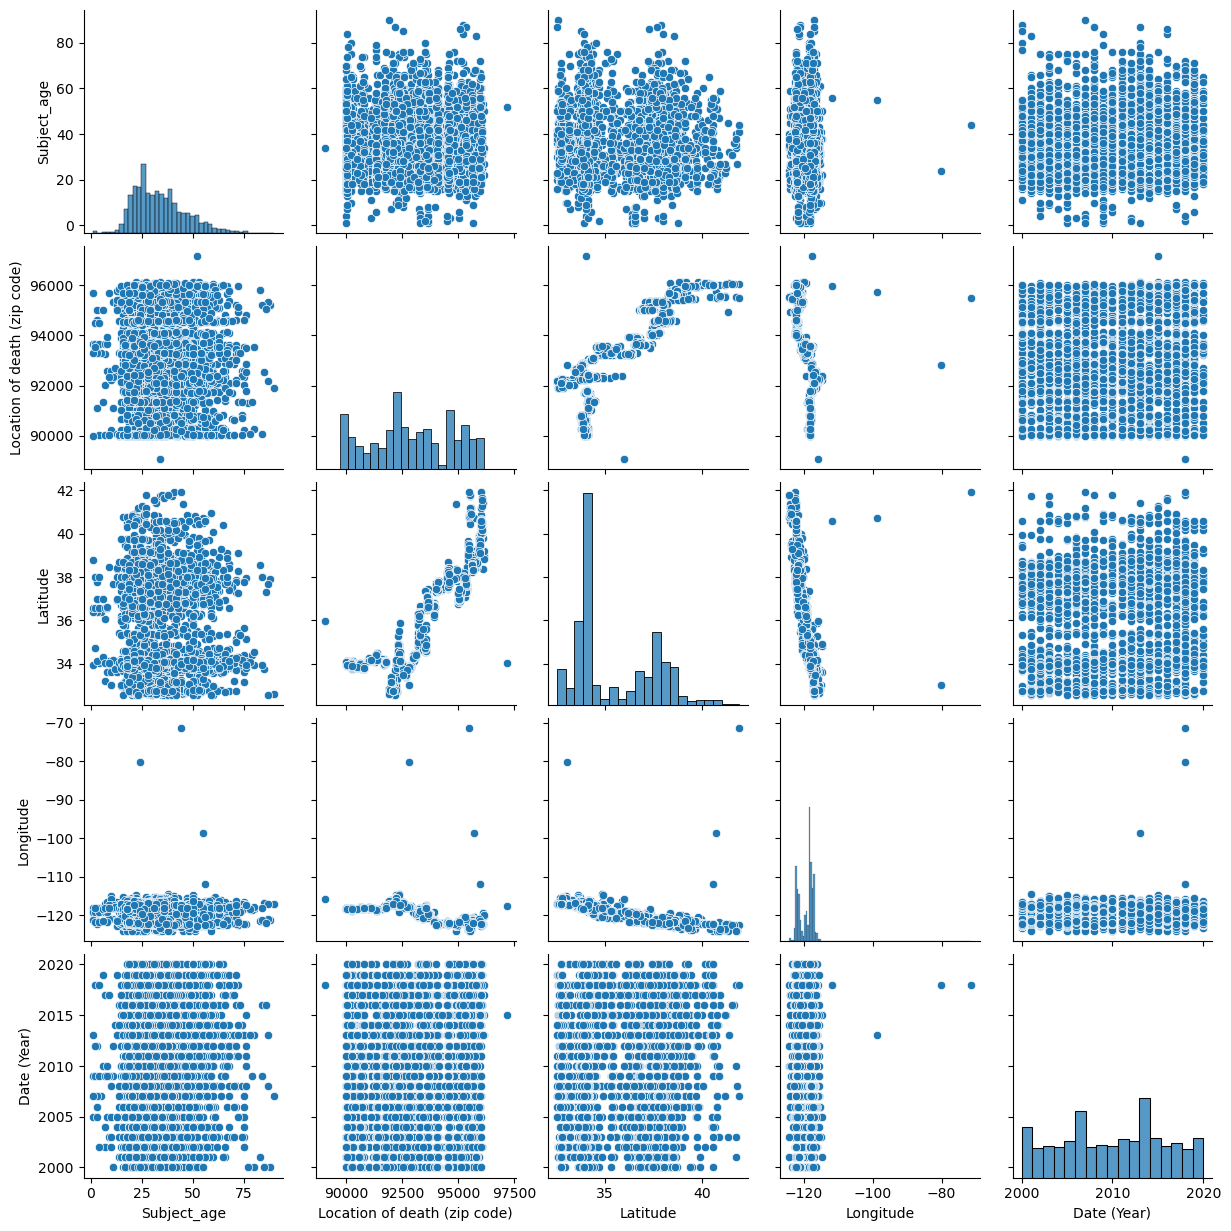

In [381]:
# Reset the index to remove any duplicate labels
ca_deaths2.reset_index(drop=True, inplace=True)

# Create a pair plot
sns.pairplot(ca_deaths2)
plt.show()

# Create a pair plot
sns.pairplot(ca_deaths2)

# Display the plot
plt.show()

# Mapping the causalities based on longitude and latitude as well as Gender. 

In [402]:
# Calculate the average latitude and longitude values 
average_latitude = ca_deaths2['Latitude'].mean()
average_longitude = ca_deaths2['Longitude'].mean()

# Use the average coordinates as the center
latitude_center = average_latitude
longitude_center = average_longitude


base_ca_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

for index, row in ca_deaths2.iterrows():
    gender = row["Subject_gender"]
    color = 'blue' if gender == 'Male' else 'red' if gender == 'Female' else 'gray' 

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        tooltip=f"Gender: {gender}"  
    ).add_to(base_ca_map)
    
base_ca_map

# Contingency Tables - Catrgorical Variables 

In [389]:
# Create a contingency table with Cause of Death and Gender
contingency_gender = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2["Subject_gender"])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_gender)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 501.7038013237551
P-Value: 1.5497930232409062e-89
Degrees of Freedom: 26
Expected Frequencies:
[[6.03235639e+00 6.09362251e+01 3.14185229e-02]
 [4.14161782e+00 4.18368113e+01 2.15709261e-02]
 [4.50175850e-01 4.54747948e+00 2.34466589e-03]
 [6.30246190e-01 6.36647128e+00 3.28253224e-03]
 [2.88112544e+00 2.91038687e+01 1.50058617e-02]
 [1.17045721e+00 1.18234467e+01 6.09613130e-03]
 [1.53059789e+00 1.54614302e+01 7.97186401e-03]
 [2.79109027e+02 2.81943728e+03 1.45369285e+00]
 [3.33130129e+00 3.36513482e+01 1.73505275e-02]
 [5.40211020e-01 5.45697538e+00 2.81359906e-03]
 [3.60140680e-01 3.63798359e+00 1.87573271e-03]
 [1.32351700e+01 1.33695897e+02 6.89331770e-02]
 [3.15123095e+00 3.18323564e+01 1.64126612e-02]
 [6.74363423e+01 6.81212427e+02 3.51230950e-01]]


In [390]:
# Create a contingency table with Cause of Death and Race
contingency_race = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2["Subject_race"])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_race)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 179.45702807566354
P-Value: 5.723726419198401e-10
Degrees of Freedom: 78
Expected Frequencies:
[[9.70832356e+00 2.49777257e+00 1.51594373e+01 2.06105510e+01
  2.19929660e-01 4.55568581e-01 1.83484174e+01]
 [6.66541618e+00 1.71488863e+00 1.04079719e+01 1.41505275e+01
  1.50996483e-01 3.12778429e-01 1.25974209e+01]
 [7.24501758e-01 1.86400938e-01 1.13130129e+00 1.53810082e+00
  1.64126612e-02 3.39976553e-02 1.36928488e+00]
 [1.01430246e+00 2.60961313e-01 1.58382181e+00 2.15334115e+00
  2.29777257e-02 4.75967175e-02 1.91699883e+00]
 [4.63681125e+00 1.19296600e+00 7.24032825e+00 9.84384525e+00
  1.05041032e-01 2.17584994e-01 8.76342321e+00]
 [1.88370457e+00 4.84642438e-01 2.94138335e+00 3.99906213e+00
  4.26729191e-02 8.83939039e-02 3.56014068e+00]
 [2.46330598e+00 6.33763189e-01 3.84642438e+00 5.22954279e+00
  5.58030481e-02 1.15592028e-01 4.65556858e+00]
 [4.49191090e+02 1.15568581e+02 7.01406800e+02 9.53622509e+02
  1.01758499e+01 2.10785463e+01 8.48956624e+02]
 [5.361

In [391]:
# Create a contingency table with Cause of Death and Date of injury resulting in death (month/day/year)
contingency_date = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2['Date'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_date)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 41909.94193019081
P-Value: 8.710382258920303e-07
Degrees of Freedom: 40534
Expected Frequencies:
[[0.01570926 0.03141852 0.04712778 ... 0.03141852 0.01570926 0.01570926]
 [0.01078546 0.02157093 0.03235639 ... 0.02157093 0.01078546 0.01078546]
 [0.00117233 0.00234467 0.003517   ... 0.00234467 0.00117233 0.00117233]
 ...
 [0.03446659 0.06893318 0.10339977 ... 0.06893318 0.03446659 0.03446659]
 [0.00820633 0.01641266 0.02461899 ... 0.01641266 0.00820633 0.00820633]
 [0.17561547 0.35123095 0.52684642 ... 0.35123095 0.17561547 0.17561547]]


In [392]:
# Create a contingency table with Cause of Death and Location of injury (address)
contingency_address = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2['Location of injury (address)'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_address)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 54239.981911277144
P-Value: 2.1776927325544836e-07
Degrees of Freedom: 52585
Expected Frequencies:
[[0.01570926 0.01570926 0.01570926 ... 0.01570926 0.03141852 0.03141852]
 [0.01078546 0.01078546 0.01078546 ... 0.01078546 0.02157093 0.02157093]
 [0.00117233 0.00117233 0.00117233 ... 0.00117233 0.00234467 0.00234467]
 ...
 [0.03446659 0.03446659 0.03446659 ... 0.03446659 0.06893318 0.06893318]
 [0.00820633 0.00820633 0.00820633 ... 0.00820633 0.01641266 0.01641266]
 [0.17561547 0.17561547 0.17561547 ... 0.17561547 0.35123095 0.35123095]]


In [393]:
# Create a contingency table with Cause of Death and Location of death (city) 
contingency_city = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2['Location of death (city)'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_city)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 10654.801127806735
P-Value: 1.0008735517107685e-41
Degrees of Freedom: 8749
Expected Frequencies:
[[0.03141852 0.09425557 0.01570926 ... 0.07854631 0.09425557 0.01570926]
 [0.02157093 0.06471278 0.01078546 ... 0.05392732 0.06471278 0.01078546]
 [0.00234467 0.007034   0.00117233 ... 0.00586166 0.007034   0.00117233]
 ...
 [0.06893318 0.20679953 0.03446659 ... 0.17233294 0.20679953 0.03446659]
 [0.01641266 0.04923798 0.00820633 ... 0.04103165 0.04923798 0.00820633]
 [0.35123095 1.05369285 0.17561547 ... 0.87807737 1.05369285 0.17561547]]


In [394]:
# Create a contingency table with Cause of Death and Location of death (county) 
contingency_county = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2['Location of death (county)'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_county)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 1101.0129690915455
P-Value: 2.6599013860434796e-24
Degrees of Freedom: 663
Expected Frequencies:
[[3.48745604e+00 3.14185229e-02 5.96951934e-01 3.14185229e-02
  1.80656506e+00 7.85463072e-02 2.35638921e-01 2.30926143e+00
  1.57092614e-02 3.14185229e-01 5.34114889e-01 4.71277843e-02
  2.10504103e+00 2.98475967e-01 1.88511137e-01 1.80499414e+01
  2.67057444e-01 2.51348183e-01 2.19929660e-01 5.81242673e-01
  1.57092614e-02 6.12661196e-01 2.67057444e-01 9.42555686e-02
  3.78593200e+00 4.39859320e-01 3.14185229e-02 3.95873388e+00
  2.30926143e+00 9.42555686e-02 4.88558030e+00 4.83845252e+00
  1.41383353e+00 1.58663540e+00 1.72801876e-01 6.12661196e-01
  5.49824150e-01 2.13645955e+00 2.35638921e-01 6.12661196e-01
  9.42555686e-02 9.73974209e-01 8.16881594e-01 1.33528722e+00
  2.19929660e-01 2.35638921e-01 3.14185229e-02 1.55521688e+00
  4.71277843e-02 1.08393904e+00 3.45603751e-01 1.57092614e-01]
 [2.39437280e+00 2.15709261e-02 4.09847597e-01 2.15709261e-02
  1.24032825e+00

In [395]:
# Create a contingency table with Cause of Death and Agency responsible for death
contingency_agency = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2['Agency responsible for death'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_agency)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 9074.546886788778
P-Value: 4.929431769317447e-43
Degrees of Freedom: 7293
Expected Frequencies:
[[4.39859320e-01 1.57092614e-02 6.28370457e-02 ... 9.42555686e-02
  1.57092614e-02 1.41383353e-01]
 [3.01992966e-01 1.07854631e-02 4.31418523e-02 ... 6.47127784e-02
  1.07854631e-02 9.70691676e-02]
 [3.28253224e-02 1.17233294e-03 4.68933177e-03 ... 7.03399766e-03
  1.17233294e-03 1.05509965e-02]
 ...
 [9.65064478e-01 3.44665885e-02 1.37866354e-01 ... 2.06799531e-01
  3.44665885e-02 3.10199297e-01]
 [2.29777257e-01 8.20633060e-03 3.28253224e-02 ... 4.92379836e-02
  8.20633060e-03 7.38569754e-02]
 [4.91723329e+00 1.75615475e-01 7.02461899e-01 ... 1.05369285e+00
  1.75615475e-01 1.58053927e+00]]


In [396]:
# Create a contingency table with Cause of Death and Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS  
contingency_dis = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2['Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_dis)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 1740.494424391095
P-Value: 2.1521886329705275e-169
Degrees of Freedom: 390
Expected Frequencies:
[[4.71277843e-01 6.28370457e-02 3.14185229e-02 1.25674091e-01
  3.14185229e-02 3.14185229e-02 2.21500586e+00 1.22532239e+00
  1.57092614e-02 1.57092614e-02 2.04220399e-01 9.07995311e+00
  1.83798359e+00 4.71277843e-02 1.57092614e-02 1.57092614e-02
  4.71277843e-02 1.57092614e-02 4.24150059e-01 1.09964830e-01
  3.14185229e-02 3.14185229e-02 6.28370457e-02 1.27716295e+01
  4.71277843e-02 9.73974209e-01 1.57092614e-02 2.90621336e+00
  3.56600234e+00 3.05388042e+01 3.14185229e-02]
 [3.23563892e-01 4.31418523e-02 2.15709261e-02 8.62837046e-02
  2.15709261e-02 2.15709261e-02 1.52075029e+00 8.41266120e-01
  1.07854631e-02 1.07854631e-02 1.40211020e-01 6.23399766e+00
  1.26189918e+00 3.23563892e-02 1.07854631e-02 1.07854631e-02
  3.23563892e-02 1.07854631e-02 2.91207503e-01 7.54982415e-02
  2.15709261e-02 2.15709261e-02 4.31418523e-02 8.76858148e+00
  3.23563892e-02 6.68698710e-01

In [397]:
# Create a contingency table with Cause of Death and Intentional Use of Force (Developing) 
contingency_force = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2['Intentional Use of Force (Developing)'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_force)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 13474.46320955737
P-Value: 0.0
Degrees of Freedom: 91
Expected Frequencies:
[[3.14185229e-01 4.47556858e+01 1.28815944e+00 3.14185229e-02
  3.88018757e+00 3.14185229e-01 1.17348183e+01 4.68135991e+00]
 [2.15709261e-01 3.07277843e+01 8.84407972e-01 2.15709261e-02
  2.66400938e+00 2.15709261e-01 8.05674091e+00 3.21406800e+00]
 [2.34466589e-02 3.33997655e+00 9.61313013e-02 2.34466589e-03
  2.89566237e-01 2.34466589e-02 8.75732708e-01 3.49355217e-01]
 [3.28253224e-02 4.67596717e+00 1.34583822e-01 3.28253224e-03
  4.05392732e-01 3.28253224e-02 1.22602579e+00 4.89097304e-01]
 [1.50058617e-01 2.13758499e+01 6.15240328e-01 1.50058617e-02
  1.85322392e+00 1.50058617e-01 5.60468933e+00 2.23587339e+00]
 [6.09613130e-02 8.68393904e+00 2.49941383e-01 6.09613130e-03
  7.52872216e-01 6.09613130e-02 2.27690504e+00 9.08323564e-01]
 [7.97186401e-02 1.13559203e+01 3.26846424e-01 7.97186401e-03
  9.84525205e-01 7.97186401e-02 2.97749121e+00 1.18780774e+00]
 [1.45369285e+01 2.07078546e+03

In [398]:
# Create a contingency table with Cause of Death and Intentional Use of Force (Developing) 
contingency_illness = pd.crosstab(ca_deaths2['Cause of death'], ca_deaths2['Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_illness)

# Print the results
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 651.1788487065156
P-Value: 4.6256191583993595e-112
Degrees of Freedom: 39
Expected Frequencies:
[[2.38780774e+00 3.06644783e+01 2.41451348e+01 9.80257913e+00]
 [1.63939039e+00 2.10532239e+01 1.65772567e+01 6.73012896e+00]
 [1.78194607e-01 2.28839390e+00 1.80187573e+00 7.31535756e-01]
 [2.49472450e-01 3.20375147e+00 2.52262603e+00 1.02415006e+00]
 [1.14044549e+00 1.46457210e+01 1.15320047e+01 4.68182884e+00]
 [4.63305979e-01 5.94982415e+00 4.68487691e+00 1.90199297e+00]
 [6.05861665e-01 7.78053927e+00 6.12637749e+00 2.48722157e+00]
 [1.10480657e+02 1.41880422e+03 1.11716295e+03 4.53552169e+02]
 [1.31864009e+00 1.69341149e+01 1.33338804e+01 5.41336460e+00]
 [2.13833529e-01 2.74607268e+00 2.16225088e+00 8.77842907e-01]
 [1.42555686e-01 1.83071512e+00 1.44150059e+00 5.85228605e-01]
 [5.23892145e+00 6.72787808e+01 5.29751465e+01 2.15071512e+01]
 [1.24736225e+00 1.60187573e+01 1.26131301e+01 5.12075029e+00]
 [2.66935522e+01 3.42801407e+02 2.69920985e+02 1.09584056e+02]]


# ANOVA between numerical variables and Cause of Death 

In [400]:
# ANOVA between numberical variables and Cause of Death 

for predictor in ["Subject_age", "Location of death (zip code)", "Latitude", "Longitude", "Date (Year)"]:
    grouped_data = [ca_deaths2[predictor][ca_deaths2['Cause of death'] == category] for category in ca_deaths2['Cause of death'].unique()]
    f_statistic, p_value = stats.f_oneway(*grouped_data)
    print(f'{predictor} vs. Cause of Death:')
    print(f'F-statistic: {f_statistic}')
    print(f'P-value: {p_value}\n')

Subject_age vs. Cause of Death:
F-statistic: nan
P-value: nan

Location of death (zip code) vs. Cause of Death:
F-statistic: 5.981748785669237
P-value: 3.762969172888717e-11

Latitude vs. Cause of Death:
F-statistic: 4.24434502206434
P-value: 4.220673715172627e-07

Longitude vs. Cause of Death:
F-statistic: 2.449616704179793
P-value: 0.0026004832621608215

Date (Year) vs. Cause of Death:
F-statistic: 4.218517606299236
P-value: 4.825742845080956e-07

